## **Optimization using Tensorflow Keras**
In this scenario of hackerrank, you will be exploring about the **Optimisation** and different optimizers present and how to use it.  

We will look at three scenarios here
1. Tuning different optimisation algorithms, 
2. Tuning learning rate and momentum of SGD optimizer
3. Tuning beta values of Adam optimizer

**Note** - Finally restart and run all the cells after the completion of the challenge


### Import the required packages

In [1]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.utils import shuffle
from keras.utils.np_utils import to_categorical
from keras.optimizers import SGD,Adam
from matplotlib import pyplot
import seaborn as sns
import pandas as pd
from keras.models import model_from_json


Using TensorFlow backend.


### Load the Dataset

- Load the iris dataset using load_iris() function.
- Store the data of the iris dataset in the variable **X**.
- Store the target of the iris dataset in the variable **y**.
- Convert the variable **y** into categorial variable using function to_categorial and save it in variable **y**.
- Set seed value as 7 in the variable **seed** and use random.seed function in numpy to set seed value.
- Now shuffle the data **X** and **y** using shuffle function and save it in variables **X** ,**Y**.

In [2]:
# fix random seed for reproducibility

iris = load_iris()
X= iris.data
#Y = to_categorical(iris.target,3)
y = iris.target
y = to_categorical(y)
seed =7

X, Y = shuffle(X,y)

---------------------------------------------------------------------------
## **1.Tuning Different Optimisation Algorithms**
-------------------------------------------------------------------

In variable optimizer pass the following optimizers as a list -
- SGD,RMSprop,Adam,Nadam

In param_grid pass parameter optimizer as optimizer using dict

In [3]:
optimizer = ['SGD',"RMSprop",'Adam','Nadam']

param_grid = dict(optimizer=optimizer)

### Create Model

Construct a fully-connected network structure defined using dense class in the function create_model
- Create a sequential model
- The model expects rows of data with 4 variables (the input_dim=4 argument)
- The first hidden layer has 64 nodes and uses the relu activation function.
- The second hidden layer has 32 nodes and uses the relu activation function.
- The third hidden layer has 16 nodes and uses the relu activation function.
- The output layer has 3 nodes and uses the softmax activation function.
- While comipling the model pass the following parameters -
                    
           -optimizer as optimizer
           -loss as categorical cross entropy 
           -metrics as accuracy.
 -  Return the compiled model

In [4]:
def create_model(optimizer='adam'):
    
    model = Sequential()
    model.add(Dense(64, input_dim=4, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

Use the KerasClassifier function to call the model function with following parameters -
- build_fn as create_model
- batch_size as 10
- verbose as 0
- epochs as 10

Save the above in the variable model

In [5]:
model = KerasClassifier(build_fn=create_model,epochs=10, batch_size=10,shuffle=True,validation_split=0.2,verbose=0)

In grid use the GridSearchCV function and pass the following parameters -
- estimator as model
- param_grid as param_grid
- n_jobs as 1

Now fit the model with X and Y using grid and save it in grid_result

**Note** - While running fit model this might take upto 2-5 minutes to run this cell

In [6]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, Y)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


### Run the below cell to summarize the results

In [7]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.940000 using {'optimizer': 'Adam'}
0.713333 (0.263987) with: {'optimizer': 'SGD'}
0.913333 (0.052493) with: {'optimizer': 'RMSprop'}
0.940000 (0.032660) with: {'optimizer': 'Adam'}
0.913333 (0.047140) with: {'optimizer': 'Nadam'}


### Run the below cell to plot the results

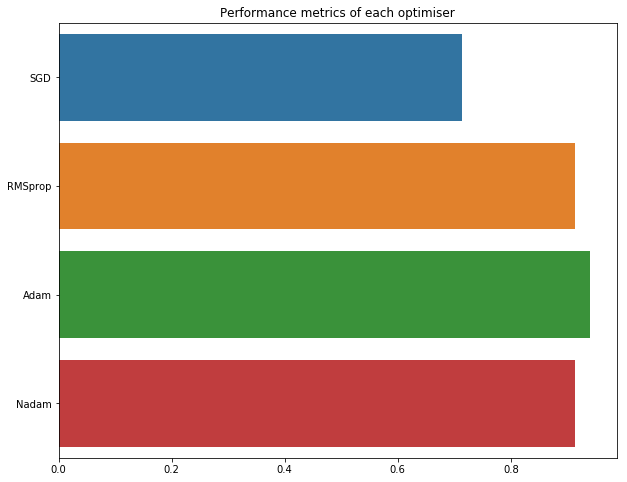

In [8]:
pyplot.figure(figsize=(10,8))
#pyplot.xticks(grid_result1.cv_results_['mean_test_score'])
pyplot.title("Performance metrics of each optimiser")
plot=sns.barplot(grid_result.cv_results_['mean_test_score'],optimizer)
pyplot.show() 

---------------------------------------------------------------------------
## **2.Tuning Learning rate and Momentum of SGD Optimizer**
-------------------------------------------------------------------
In variable learn_rate pass the following learn rates as a list -
- 0.001, 0.01,0.3

In variable momentum pass the following momentums as a list -
- 0.0, 0.4, 0.9

In [9]:
learn_rate = [0.001, 0.01,0.3]
momentum = [0.0, 0.4, 0.9]


### Create Model

Use the same model parameters as above to construct the model in the function create_model1

In the variable optimizer pass the following parameters using the optimizer SGD

     -lr as learn_rate
     -momentum as momentum
While comipling the model pass the following parameters -

     -optimizer as optimizer
     -loss as categorical cross entropy 
     -metrics as accuracy.
Return the compiled model

In [10]:
def create_model1(learn_rate=0.01, momentum=0):
    model = Sequential()
    model.add(Dense(64, input_dim=4, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    optimizer=SGD(learning_rate=learn_rate, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model


Use the KerasClassifier function to call the model function with following parameters -

- build_fn as create_model1
- batch_size as 10
- verbose as 0
- epochs as 10

Save the above in the variable model1

In [11]:
model1 = KerasClassifier(build_fn=create_model1,epochs=10, batch_size=10,shuffle=True,validation_split=0.2,verbose=0)

In param_grid1 pass parameter learn_rate as learn_rate and momentum as momentum using dict

In grid1 use the GridSearchCV function and pass the following parameters -
- estimator as model1
- param_grid as param_grid1
- n_jobs as 1



In [12]:
param_grid1 = dict(learn_rate=learn_rate,momentum=momentum)
grid1 = GridSearchCV(estimator=model1, param_grid=param_grid1, n_jobs=1)

Use random.seed function in numpy to set seed value.

Now fit the model with X and Y using grid1 and save it in grid_result1

**Note** - While running fit model this might take upto 2-5 minutes to run this cell

In [13]:
grid_result1 = grid1.fit(X, Y)

### Run the below cell to summarize the results

In [14]:
# summarize results
print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))
means1 = grid_result1.cv_results_['mean_test_score']
stds1 = grid_result1.cv_results_['std_test_score']
params1 = grid_result1.cv_results_['params']
for mean, stdev, param in zip(means1, stds1, params1):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.946667 using {'learn_rate': 0.01, 'momentum': 0.9}
0.533333 (0.287673) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.640000 (0.016330) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.746667 (0.083799) with: {'learn_rate': 0.001, 'momentum': 0.9}
0.660000 (0.032660) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.840000 (0.081650) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.946667 (0.047140) with: {'learn_rate': 0.01, 'momentum': 0.9}
0.440000 (0.155778) with: {'learn_rate': 0.3, 'momentum': 0.0}
0.440000 (0.141421) with: {'learn_rate': 0.3, 'momentum': 0.4}
0.320000 (0.016330) with: {'learn_rate': 0.3, 'momentum': 0.9}


### Run the below cell to plot the results

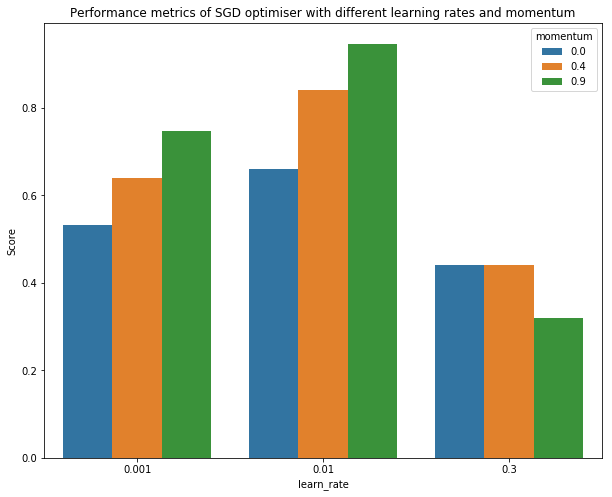

In [15]:
params1=pd.DataFrame(params1)
pyplot.figure(figsize=(10,8))
#pyplot.xticks(grid_result1.cv_results_['mean_test_score'])
pyplot.title("Performance metrics of SGD optimiser with different learning rates and momentum")
plot1=sns.barplot(params1["learn_rate"],grid_result1.cv_results_['mean_test_score'],hue=params1["momentum"])
plot1.set(ylabel='Score')
pyplot.show() 

---------------------------------------------------------------------------
## **3.Tuning beta values of Adam Optimizer**
-------------------------------------------------------------------


In variable beta_1 pass the following learn rates as a list -
- 0.001, 0.01,0.3

In variable beta_2 pass the following momentums as a list -
- 0.0, 0.4, 0.9

In [16]:
beta_1 = [0.001, 0.01,0.3]
beta_2 = [0.0, 0.4, 0.9]

### Create Model

Use the same model parameters as above to construct the model in the function create_model2

In the variable optimizer pass the following parameters using the optimizer Adam

     -beta_1 as beta_1
     -beta_2 as beta_2
While comipling the model pass the following parameters -

     -optimizer as optimizer
     -loss as categorical cross entropy 
     -metrics as accuracy.
Return the compiled model

In [17]:
def create_model2(beta_1=0.01, beta_2=0):
    model = Sequential()
    model.add(Dense(64, input_dim=4, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    optimizer=Adam(beta_1=beta_1, beta_2=beta_2)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


Use the KerasClassifier function to call the model function with following parameters -

- build_fn as create_model2
- batch_size as 10
- verbose as 0
- epochs as 10

Save the above in the variable model2

In [18]:
model2 = KerasClassifier(build_fn=create_model2,epochs=10, batch_size=10,shuffle=True,validation_split=0.2,verbose=0)

In param_grid2 pass parameter beta_1 as beta_1 and beta_2 as beta_2 using dict

In grid2 use the GridSearchCV function and pass the following parameters -
- estimator as model2
- param_grid as param_grid2
- n_jobs as 1

In [19]:
param_grid2 = dict(beta_1=beta_1,beta_2=beta_2)
grid2 = GridSearchCV(estimator=model2, param_grid=param_grid2, n_jobs=1)

Use random.seed function in numpy to set seed value.

Now fit the model with X and Y using grid2 and save it in grid_result2

**Note** - While running fit model this might take upto 2-5 minutes to run this cell

In [20]:

grid_result2 = grid2.fit(X, Y)

### Run the below cell to summarize the results

In [21]:
# summarize results
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
means2 = grid_result2.cv_results_['mean_test_score']
stds2 = grid_result2.cv_results_['std_test_score']
params2 = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means2, stds2, params2):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.913333 using {'beta_1': 0.01, 'beta_2': 0.4}
0.833333 (0.108730) with: {'beta_1': 0.001, 'beta_2': 0.0}
0.833333 (0.095685) with: {'beta_1': 0.001, 'beta_2': 0.4}
0.753333 (0.049889) with: {'beta_1': 0.001, 'beta_2': 0.9}
0.313333 (0.009428) with: {'beta_1': 0.01, 'beta_2': 0.0}
0.913333 (0.065997) with: {'beta_1': 0.01, 'beta_2': 0.4}
0.886667 (0.092856) with: {'beta_1': 0.01, 'beta_2': 0.9}
0.340000 (0.016330) with: {'beta_1': 0.3, 'beta_2': 0.0}
0.886667 (0.049889) with: {'beta_1': 0.3, 'beta_2': 0.4}
0.786667 (0.191369) with: {'beta_1': 0.3, 'beta_2': 0.9}


### Run the below cell to plot the results

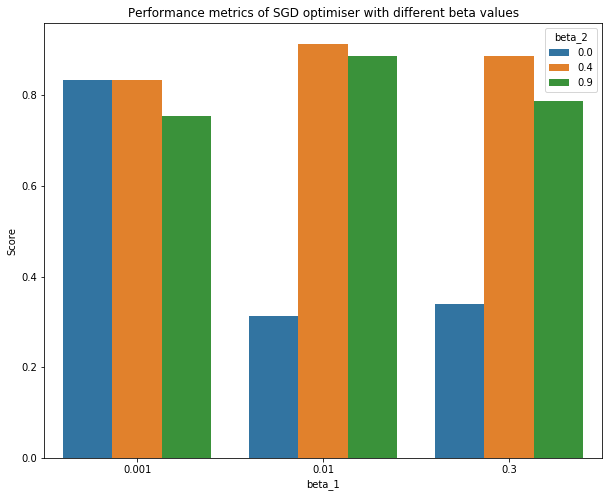

In [22]:
params2=pd.DataFrame(params2)
pyplot.figure(figsize=(10,8))
#pyplot.xticks(grid_result1.cv_results_['mean_test_score'])
pyplot.title("Performance metrics of SGD optimiser with different beta values")
plot2=sns.barplot(params2["beta_1"],grid_result2.cv_results_['mean_test_score'],hue=params2["beta_2"])
plot2.set(ylabel='Score')
pyplot.show() 

**Note**

In the same way you can use other optimization algorithms and perform operations using it.

You can tune parameters of other optimizers in the same way as we did in this excercise.

### Run the below cells to save your scores and model for testing

In [23]:
with open("score.txt","w") as f:
    f.write(str(round(grid_result.best_score_,2)))
with open("params.txt","w") as f:
    f.write(str(grid_result.best_params_))

with open("score1.txt","w") as f:
    f.write(str(round(grid_result1.best_score_,2)))
with open("params1.txt","w") as f:
    f.write(str(grid_result1.best_params_))
    
with open("score2.txt","w") as f:
    f.write(str(round(grid_result2.best_score_,2)))
with open("params2.txt","w") as f:
    f.write(str(grid_result2.best_params_))
        

In [24]:
def save_model(model):
    # saving model
    json_model = model.to_json()
    open('model.json', 'w').write(json_model)
    # saving weights
    model.save_weights('model.h5', overwrite=True)
classifier=create_model()
save_model(classifier)